In [36]:
# import useful stuff
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from utils.cheaters import dctConstr

In [37]:
# read data
with open('carmilla.txt', 'r') as f:
    corpus = f.read()

In [38]:
dct = dctConstr(stop_words=["i", "you", "a"], ignore_case=True)
dct.constructor(corpus)

In [39]:
def split_by_paragraphs(data:str) -> []:
    processed=data.lower()
    while '\n\n\n' in processed:
        processed=processed.replace('\n\n\n','\n\n')
    out = processed.split('\n\n')
    return [o.replace("\n", " ") for o in out]

In [40]:
pcorp = split_by_paragraphs(corpus)
pbow = [dct(para) for para in pcorp]
ptfidf = [dct.tfidf(para) for para in pcorp]
pvec = [dct.bow_to_vec(p) for p in pbow]

In [41]:
idx_to_terms = {i:j for j, i in dct.terms.items()} # flip dictionary for reversal
print(len(pvec[0]))

4204


In [42]:
lsa = decomposition.TruncatedSVD(n_components=100, n_iter=10, random_state=42)
lsa.fit(pvec)
X = lsa.transform(pvec)

In [50]:
### K-means
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)
km.fit(X)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [51]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
print(np.shape(order_centroids))

(4, 100)


In [52]:
cluster1 = order_centroids[0,10:30]
print([idx_to_terms[i] for i in cluster1])

['case', 'extraordinary', '⊤', 'have', 'with', 'simply', 'mysterious', 'paper', 'upon', 'intelligent', 'describes', 'determined', 'lady', 'hesselius', 'strange', 'directness', 'written', 'from', 'shall', 'papers']


In [53]:
cluster2 = order_centroids[1,10:30]
print([idx_to_terms[i] for i in cluster2])

['∀', 'which', 'series', 'condensation', '⋼', 'as', 'reference', 'form', 'doctor', 'ms', 'hesselius', 'therefore', 'attached', 'after', 'any', 'directness', 'in', 'volume', 'note', 'presenting']


#### What have these in common?
The terms of two clusters both contain some special symbols such as '⊤', '∀', etc., which do not seem to represent a category accurately.

Both clusters contain a large number of stopwords, such as 'upon', 'which', 'as', etc. These terms have no real meaning, and would negatively affect the performance of clustering.

In [14]:
### Printing the terms for cluster 3 will result in an error, fix it
cluster3 = order_centroids[2,10:30]
print([idx_to_terms[i] for i in cluster3])
cluster4 = order_centroids[3,10:30]
print([idx_to_terms[i] for i in cluster4])

['⋕', 'but', 'directness', 'forestall', 'has', 'from', 'sheridan', 'determined', 'essay', 'intelligent', 'extraordinary', 'hesselius', 'he', 'lefanu', 'prologue', 'ms', 'after', 'strange', 'extract', 'due']
['⊥', '∊', 'hesselius', 'to', 'illuminates', 'reference', 'this', 'paper', 's', 'sheridan', 'publish', 'his', 'treats', '⋃', '⊤', 'prologue', 'nothing', 'papers', 'essay', 'interest']


In [15]:
### Cluster the LSA representation for 7 centers
km_7 = KMeans(n_clusters=7, init='k-means++', max_iter=100, n_init=1)
km_7.fit(X)

KMeans(max_iter=100, n_clusters=7, n_init=1)

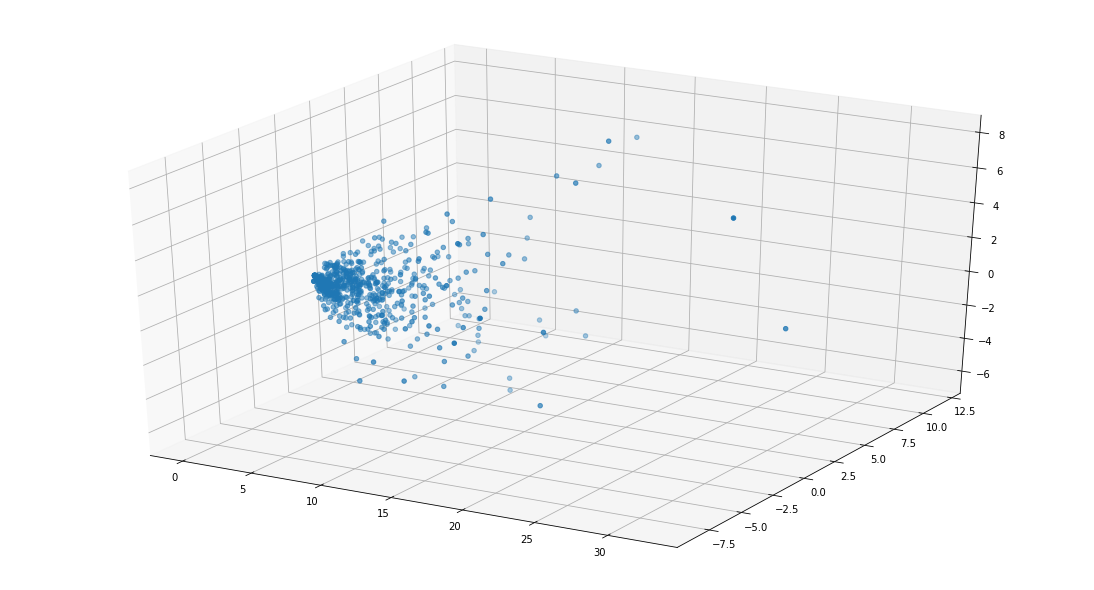

In [26]:
### Plot the first three dimensions of the LSA for all documents
x = X[:,0] # use the first dimension of X as "x"
y = X[:,1] # use the second dimension of X as "y"
z = X[:,2] # use the third dimension of X as "z"

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 8)) # define a figure, use a figsize of 15 * 8
ax = Axes3D(fig) # define a 3D figure 
ax.scatter(x, y, z) # use scatter to draw the points
plt.show() # show the figure

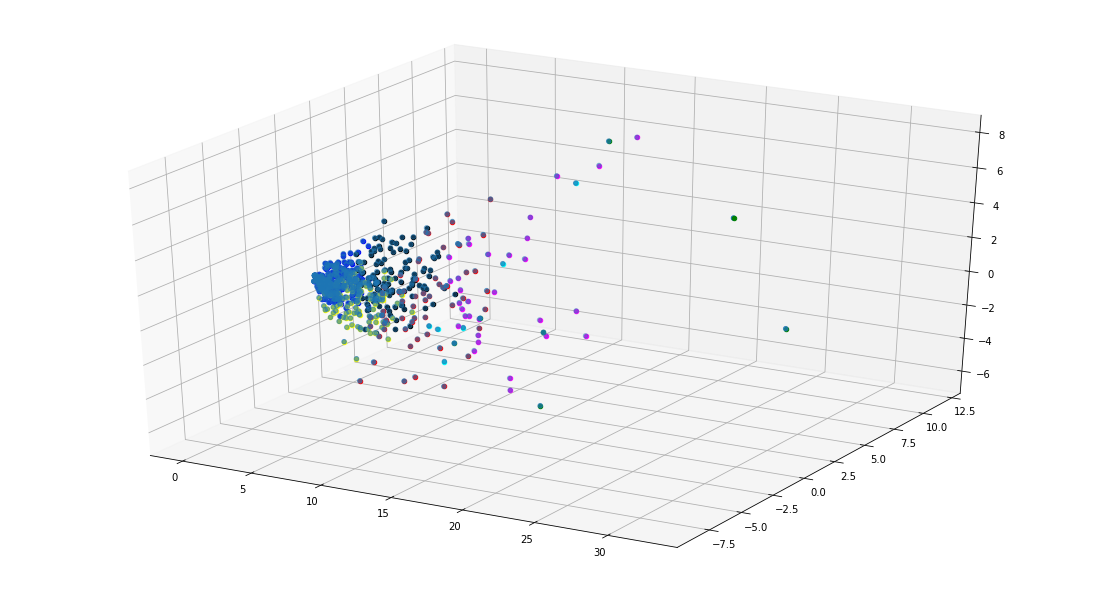

In [28]:
# Color the points according to the clusters
colors = ['blue', 'cyan', 'green', 'magenta', 'red', 'black', 'yellow'] # define 7 different colors
labels = km_7.predict(X) # use km_7 to predict X and get the cluster labels

fig = plt.figure(figsize=(15, 8)) # define a figure, use a figsize of 15 * 8
ax1 = Axes3D(fig) # define a 3D figure 
ax1.scatter(x, y, z) # use scatter to draw the points

# plot the figure point by point
for i in range(len(X)):
    x, y, z = X[i, 0], X[i, 1], X[i, 2]
    ax1.scatter(x, y, z, c=colors[int(labels[i])]) # the color are depend on the cluster label of the sample

plt.show()